# Replicating _Why Your Friends Have More Friends that You Do_

In [5]:
from __future__ import print_function, division

%matplotlib inline
%precision 3

import warnings
warnings.filterwarnings('ignore')

import random
import networkx as nx
import numpy as np

import thinkplot
from thinkstats2 import Pmf, Cdf

We'll start with the Facebook SNAP dataset, available from http://snap.stanford.edu/data/egonets-Facebook.html

In [6]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

In [7]:
fb = read_graph('facebook_combined.txt.gz')
n = len(fb)
m = len(fb.edges())
n, m, m/n

(4039, 88234, 21.846)

In [8]:
def generate_nodes(G):
    for node in G:
        yield node

In [9]:
def generate_friends(G):
    for node in G:
        for friend in G[node]:
            yield friend

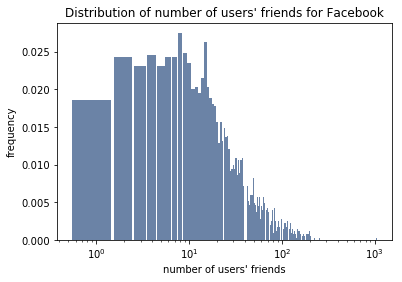

In [48]:
node_degree = [fb.degree(node) for node in generate_nodes(fb)]
node_pmf = Pmf(node_degree)
thinkplot.Hist(node_pmf)
thinkplot.Config(
    xlabel='number of users\' friends',
    ylabel='frequency',
    xscale='log',
    title='Distribution of number of users\' friends for Facebook'
)

In [28]:
node_pmf.Mean()

43.691

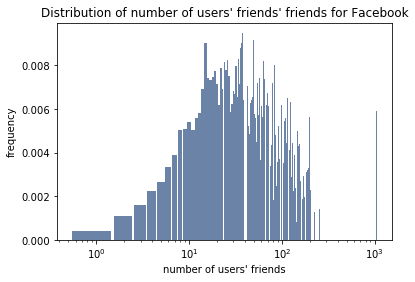

In [49]:
friend_degree = [fb.degree(node) for node in generate_friends(fb)]
friend_pmf = Pmf(friend_degree)
thinkplot.Hist(friend_pmf)
thinkplot.Config(
    xlabel='number of users\' friends',
    ylabel='frequency',
    xscale='log',
    title='Distribution of number of users\' friends\' friends for Facebook'
)

In [33]:
friend_pmf.Mean()

106.570

The distribution of friends' friends is shifted right relative to the distribution of friends, matching Feld's results as one would expect.

In [32]:
node_pmf.ProbLess(43.691)

0.675

In this case, if individuals compared their number of friends with the mean number of friends of their own friends, and their friends were a representative sample of friends (with a mean number of friends of friends of 106.570), then 67.5% of individuals would find themselves as relatively deprived, again similar to Feld's results.

Comparing number of friends and number of friends' friends

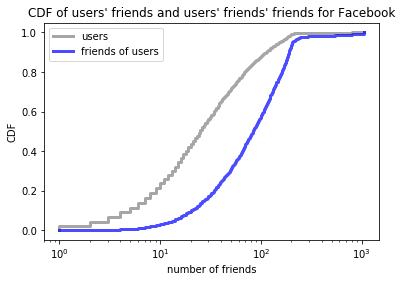

In [47]:
thinkplot.Cdf(Cdf(node_degree), color='gray', label='users')
thinkplot.Cdf(Cdf(friend_degree), color='blue', label='friends of users')
thinkplot.config(
    xlabel='number of friends',
    ylabel='CDF',
    xscale='log',
    title='CDF of users\' friends and users\' friends\' friends for Facebook'
)